<a href="https://colab.research.google.com/github/dspierre/data-ia/blob/dspierre-machinelearning/Case_study_Shippeo_version01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working Environment

This python environment contains most of the packages required for the task. **Shall you** need extra packages, you can access to the shell and can install like that: 

```shell
!pip install myPackage
```



```shell
!pip install -e git+https://github.com/scikit-learn/scikit-learn.git
```

# Challenge Description


### Dataset Information

This dataset contains information of shippements on a time window of approx 6 month.


### Content

There are 15 variables:

| Name | Description |
| -----| ----- | 
| mean_id |  unique ID of the truck |
| mean_organization_id |  unique ID of the carrier organization |
| organization_id |  unique ID of the shipper organization |
| agency_id |  unique ID of the shipper agency |
| origin_history_place_id |  unique ID of the origin of the trip |
| destination_history_place_id |  unique ID of the destination of the trip |
| trip_distance |  distance in meter of the trip returned by the routing API |
| trip_base_time |  duration estimated in second for the trip returned by the routing API |
| origin_slot_start | start of the time window for the appoinement at the origin |
| origin_slot_end |  end of the time window for the appoinement at the origin |
| destination_slot_start |  start of the time window for the appoinement at the destination |
| destination_slot_end |  end of the time window for the appoinement at the destination |
| origin_arrival_ts | arrival timestamp at the origin|
| destination_arrival_ts |  **Do not use as a feature:**  arrival timestamp at the destination  |
| trip_duration | **Target:** duration in seconds of the trip between origin and destination |


# Instructions

The goal of this study case is to predict the travel time of the truck between two warehouses. 

***The assessment is not done on the performance of the algorithm but rather on the explanation and coding skills***. Fairly good models with clean code and clear justifications will be prefered to high-performance models that are poorly explained. You are encouraged to provide as much details as you can in markdown cells or in comments, even if you have ideas you do not have time to explore. 

In the first part you are guided with intermediate steps that you are encouraged to follow. In the second part you can go wild...


# Data Loading

Load the train data set located at `./interview_dataset.csv`

In [ ]:
!pip install myPackage

     |████████████████████████████████| 133kB 5.6MB/s 
  Created wheel for myPackage: filename=Mypackage-0.1-cp36-none-any.whl size=1815 sha256=696196bafb6204ea7bfc91589586fc29ad40f02e69f92b3f9443329e14cb2f2e
  Stored in directory: /root/.cache/pip/wheels/f1/84/35/381eeb209290a95a44ea08cf82c5075cb076f7237732740388
  Created wheel for pyperclip: filename=pyperclip-1.8.1-cp36-none-any.whl size=11119 sha256=a3e8b1ce2f97270747421b9052a3d73d240fc0f00ff1574850e9710e99c851b1
  Stored in directory: /root/.cache/pip/wheels/44/10/3a/c830e9bb3db2c93274ea1f213a41fabde0d8cf3794251fad0c
Successfully built myPackage pyperclip


In [ ]:
!pip install -e git+https://github.com/scikit-learn/scikit-learn.git

ERROR: Could not detect requirement name for 'git+https://github.com/scikit-learn/scikit-learn.git', please specify one with #egg=your_package_name


In [ ]:
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
df =pd.read_csv('/content/sample_data/interview_dataset.csv', sep=',',encoding='utf8') 

In [ ]:
df

,Unnamed: 0,mean_id,mean_organization_id,organization_id,agency_id,origin_history_place_id,destination_history_place_id,trip_distance,trip_base_time,origin_slot_start,origin_slot_end,destination_slot_start,destination_slot_end,origin_arrival_ts,destination_arrival_ts,trip_duration
0,0,53431.0,4258,2693,2694.0,125338,34889,142734.0,9180.0,2020-10-14 05:00:00+00:00,2020-10-14 05:00:00+00:00,2020-10-14 09:15:00+00:00,2020-10-14 09:15:00+00:00,2020-10-14 05:08:11+00:00,2020-10-14 08:41:54+00:00,12823
1,1,53438.0,4258,2693,2694.0,125338,34889,118589.0,9261.0,2020-10-26 06:00:00+00:00,2020-10-26 06:00:00+00:00,2020-10-26 10:15:00+00:00,2020-10-26 10:15:00+00:00,2020-10-26 06:04:56+00:00,2020-10-26 09:23:27+00:00,11911
2,2,53420.0,4258,2693,2694.0,35823,104707,234555.0,13708.0,2020-07-29 17:00:00+00:00,2020-07-29 17:00:00+00:00,2020-07-29 21:30:00+00:00,2020-07-29 21:30:00+00:00,2020-07-29 16:04:00+00:00,2020-07-29 19:40:29+00:00,12989
3,3,53420.0,4258,2693,2694.0,35823,104707,235880.0,13649.0,2020-09-01 17:00:00+00:00,2020-09-01 17:00:00+00:00,2020-09-01 21:30:00+00:00,2020-09-01 21:30:00+00:00,2020-09-01 16:05:43+00:00,2020-09-01 20:55:54+00:00,17411
4,4,46011.0,4018,2693,2694.0,125338,33769,36567.0,4165.0,2020-10-09 07:30:00+00:00,2020-10-09 07:30:00+00:00,2020-10-09 10:30:00+00:00,2020-10-09 10:30:00+00:00,2020-10-09 07:13:48+00:00,2020-10-09 10:01:11+00:00,10043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105107,105107,31374.0,1273,2693,2694.0,35823,104710,244617.0,14763.0,2020-08-12 22:30:00+00:00,2020-08-12 22:30:00+00:00,2020-08-13 04:30:00+00:00,2020-08-13 04:30:00+00:00,2020-08-12 22:24:00+00:00,2020-08-13 03:34:28+00:00,18628
105108,105108,31374.0,1273,2693,2694.0,35823,34386,283926.0,16759.0,2020-06-29 09:00:00+00:00,2020-06-29 09:00:00+00:00,2020-06-29 15:00:00+00:00,2020-06-29 15:00:00+00:00,2020-06-29 08:20:21+00:00,2020-06-29 14:28:54+00:00,22113
105109,105109,109263.0,1273,2693,2694.0,45572,114126,22230.0,2917.0,2020-07-03 01:30:00+00:00,2020-07-03 01:30:00+00:00,2020-07-03 03:00:00+00:00,2020-07-03 03:00:00+00:00,2020-07-03 00:55:30+00:00,2020-07-03 02:47:00+00:00,6690
105110,105110,49677.0,1273,2693,2694.0,35823,25931,31404.0,3240.0,2020-06-08 08:00:00+00:00,2020-06-08 08:00:00+00:00,2020-06-08 10:30:00+00:00,NaN,2020-06-08 07:04:13+00:00,2020-06-08 08:13:29+00:00,4156


In [ ]:
df.to_csv=('shippeo.csv')

# dataprocessing 

In [ ]:
df.dtypes

Unnamed: 0                        int64
mean_id                         float64
mean_organization_id              int64
organization_id                   int64
agency_id                       float64
origin_history_place_id           int64
destination_history_place_id      int64
trip_distance                   float64
trip_base_time                  float64
origin_slot_start                object
origin_slot_end                  object
destination_slot_start           object
destination_slot_end             object
origin_arrival_ts                object
destination_arrival_ts           object
trip_duration                     int64
dtype: object

In [ ]:
print('Les colonnes de interview sont',df.columns)

Les colonnes de interview sont Index(['Unnamed: 0', 'mean_id', 'mean_organization_id', 'organization_id',
       'agency_id', 'origin_history_place_id', 'destination_history_place_id',
       'trip_distance', 'trip_base_time', 'origin_slot_start',
       'origin_slot_end', 'destination_slot_start', 'destination_slot_end',
       'origin_arrival_ts', 'destination_arrival_ts', 'trip_duration'],
      dtype='object')


In [ ]:
df.describe(include='all')

,Unnamed: 0,mean_id,mean_organization_id,organization_id,agency_id,origin_history_place_id,destination_history_place_id,trip_distance,trip_base_time,origin_slot_start,origin_slot_end,destination_slot_start,destination_slot_end,origin_arrival_ts,destination_arrival_ts,trip_duration
count,105112.000000,101990.000000,105112.000000,105112.000000,101981.000000,105112.000000,105112.000000,101983.000000,101986.000000,105112,105112,105112,101977,105112,105112,105112.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31256,31347,32837,31444,53672,52518,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-10 04:00:00+00:00,2020-11-24 07:00:00+00:00,2020-07-18 05:00:00+00:00,2020-07-07 05:00:00+00:00,2020-09-25 12:52:22+00:00,2020-10-01 02:07:28+00:00,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,69,100,72,16,20,NaN
mean,52555.500000,90272.002088,2469.092482,4502.262805,4502.630549,134357.992484,132625.222563,46139.059431,3711.068529,NaN,NaN,NaN,NaN,NaN,NaN,10595.470707
std,30343.365085,35574.068173,994.287036,1511.504275,1511.618666,78052.672980,75846.985850,42908.246350,2480.572618,NaN,NaN,NaN,NaN,NaN,NaN,16809.378811
min,0.000000,8927.000000,1273.000000,2693.000000,2694.000000,25793.000000,25793.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
25%,26277.750000,82102.000000,1803.000000,2693.000000,2694.000000,44369.000000,44267.000000,17148.000000,1968.000000,NaN,NaN,NaN,NaN,NaN,NaN,4185.000000
50%,52555.500000,83718.000000,1803.000000,5765.000000,5766.000000,165477.000000,165494.000000,34605.000000,3238.000000,NaN,NaN,NaN,NaN,NaN,NaN,6422.000000
75%,78833.250000,89573.000000,2801.000000,5765.000000,5766.000000,168436.000000,168434.000000,57523.000000,4796.000000,NaN,NaN,NaN,NaN,NaN,NaN,9931.000000


* Regardez les valeurs manquantes et comment vous pouvez les imputer.
* Calculez quelques statistiques descriptives. 
* Calculez éventuellement les fonctionnalités

In [ ]:
df.isnull().sum()

Unnamed: 0                         0
mean_id                         3122
mean_organization_id               0
organization_id                    0
agency_id                       3131
origin_history_place_id            0
destination_history_place_id       0
trip_distance                   3129
trip_base_time                  3126
origin_slot_start                  0
origin_slot_end                    0
destination_slot_start             0
destination_slot_end            3135
origin_arrival_ts                  0
destination_arrival_ts             0
trip_duration                      0
dtype: int64

In [ ]:
%pip  install missingno

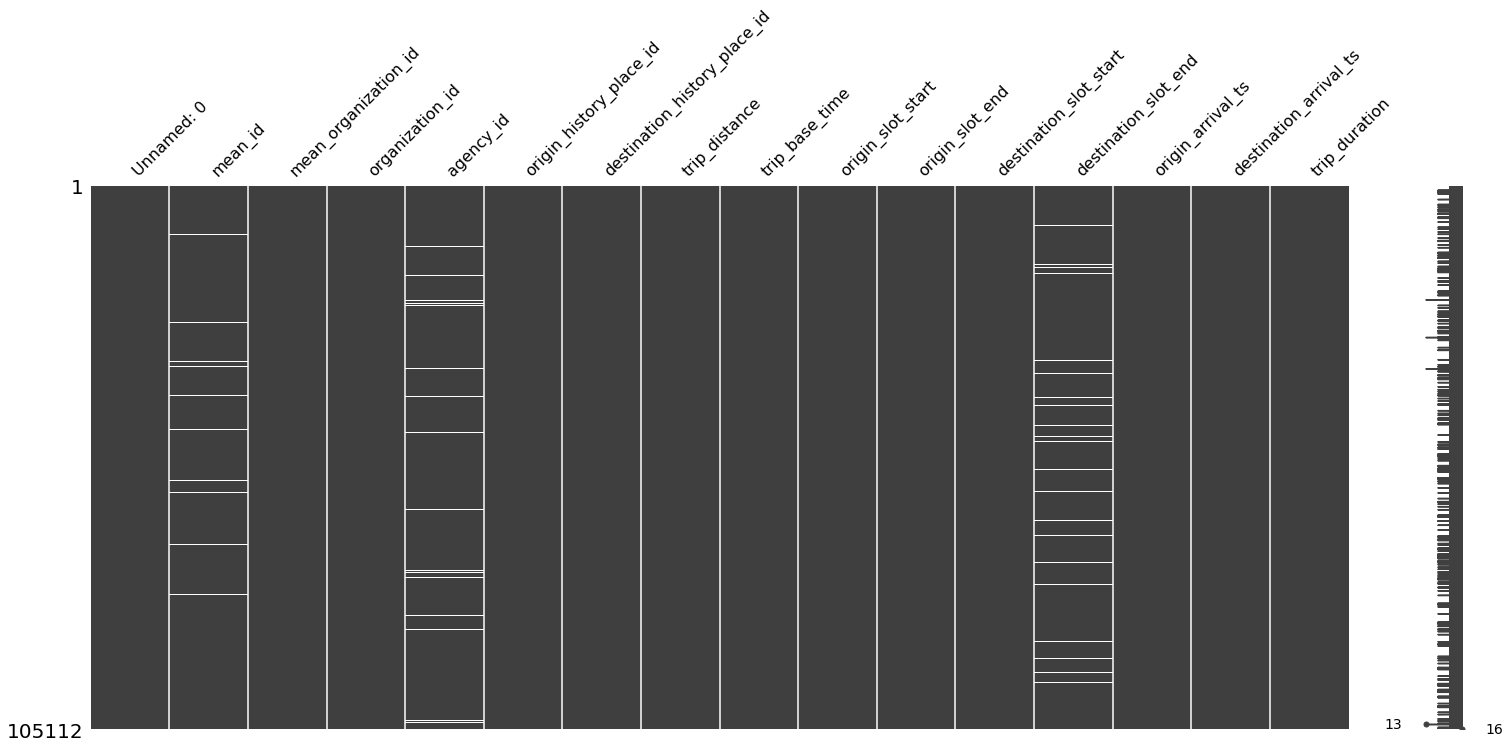

In [ ]:
import missingno as  msno
msno.matrix(df)

In [ ]:
pourcentate_agency_id =100*df.agency_id.isnull().sum()/len(df.agency_id)
print(pourcentate_agency_id)

2.978727452621965


In [ ]:
pourcentate_mean_id =100*df.mean_id.isnull().sum()/len(df.mean_id)
print(pourcentate_mean_id)

2.97016515716569


In [ ]:
pourcentate_trip_distance =100*df.trip_distance.isnull().sum()/len(df.trip_distance)
print(pourcentate_trip_distance)

2.976824720298348


In [ ]:
pourcentate_trip_base_time =100*df.trip_base_time.isnull().sum()/len(df.trip_base_time)
print(pourcentate_trip_base_time)

2.9739706218129234


In [ ]:
pourcentate_destination_slot_end =100*df.destination_slot_end.isnull().sum()/len(df.destination_slot_end)
print(pourcentate_destination_slot_end)

2.982532917269199


# Challenge Description


### Dataset Information

This dataset contains information of shippements on a time window of approx 6 month.
Each line represent a shippement between two warehouses. 

A shippement is formed by a loading and delivery phase. The shipper ask to the carrier to pick up a parcel at the loading site in a time window represented by `loading_slot_start` & `loading_slot_end`, a time window is also given for the delivery phase. 

When the carrier truck arrives at the loading site, we record `loading_arrival_ts`. At this moment we want to predict the estimated duration of the transportation for the parcel (Part I), and also if the truck will be delayed at the delivery site (Part II & III).


### Content

There are 15 variables:

| Name | Description |
| -----| ----- | 
| mean_id |  unique ID of the carrier truck |
| mean_organization_id |  unique ID of the carrier organization |
| organization_id |  unique ID of the shipper organization |
| agency_id |  unique ID of the shipper agency |
| loading_history_place_id |  unique ID of the loading site |
| delivery_history_place_id |  unique ID of the delivery site |
| trip_distance |  distance in meter of the trip returned by the routing API |
| trip_base_time |  duration estimated in second for the trip returned by the routing API |
| loading_slot_start | start of the time window for the appoinement of the loading phase |
| loading_slot_end |  end of the time window for the appoinement of the loading phase |
| delivery_slot_start |  start of the time window for the appoinement of the delivery phase |
| delivery_slot_end |  end of the time window for the appoinement of the delivery phase |
| loading_arrival_ts | arrival timestamp at the loading site|
| delivery_arrival_ts |  **Do not use as a feature:**  arrival timestamp at the delivery site  |
| trip_duration | **Target:** duration in second of the trip between loading site and delivery site |


# Instructions

***The assessment is not done on the performance of the algorithm but rather on the explanation and coding skills***. Fairly good models with clean code and clear justifications will be prefered to high-performance models that are poorly explained. You are encouraged to provide as much details as you can in markdown cells or in comments, even if you have ideas you do not have time to explore. 

In the first part you are guided with intermediate steps that you are encouraged to follow. 

In [ ]:
# remplacer par la médiane 
median_trip_distance = df['trip_distance'].median()
df['trip_distance'].fillna(median_trip_distance, inplace=True)
median_trip_base_time = df['trip_base_time'].median()
df['trip_base_time'].fillna(median_trip_base_time, inplace=True)
median_trip_base_time = df['trip_base_time'].median()
dfnoNan=df.dropna()
df_drop=df.drop(columns=['mean_id','agency_id'])

In [ ]:
df_drop.isnull().sum()

Unnamed: 0                         0
mean_organization_id               0
organization_id                    0
origin_history_place_id            0
destination_history_place_id       0
trip_distance                      0
trip_base_time                     0
origin_slot_start                  0
origin_slot_end                    0
destination_slot_start             0
destination_slot_end            1965
origin_arrival_ts                  1
destination_arrival_ts             1
trip_duration                      1
dtype: int64

# Datavisualisation 

In [ ]:
df.columns

Index(['Unnamed: 0', 'mean_id', 'mean_organization_id', 'organization_id',
       'agency_id', 'origin_history_place_id', 'destination_history_place_id',
       'trip_distance', 'trip_base_time', 'origin_slot_start',
       'origin_slot_end', 'destination_slot_start', 'destination_slot_end',
       'origin_arrival_ts', 'destination_arrival_ts', 'trip_duration'],
      dtype='object')

In [ ]:
# Etude mean_organization_id 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


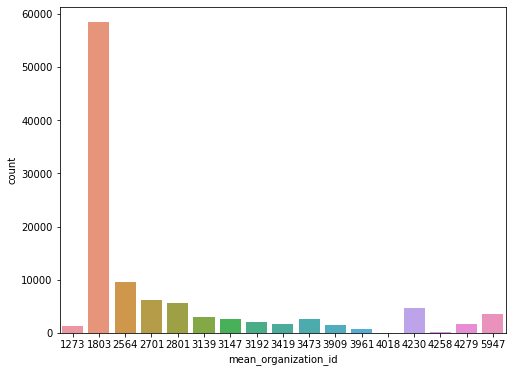

In [ ]:
sns.countplot('mean_organization_id', data=df_drop)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


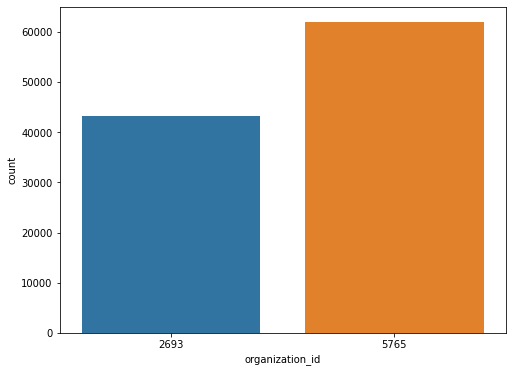

In [ ]:
# analyse organization_id
sns.countplot('organization_id', data=df_drop)
plt.show()

In [ ]:
cordia=df.corr()
print(cordia)

                              Unnamed: 0  ...  trip_duration
Unnamed: 0                      1.000000  ...      -0.056234
mean_id                        -0.140313  ...       0.055752
mean_organization_id            0.478984  ...      -0.125597
organization_id                -0.469873  ...       0.121625
agency_id                      -0.469709  ...       0.121585
origin_history_place_id        -0.384261  ...       0.069011
destination_history_place_id   -0.376908  ...       0.087505
trip_distance                  -0.108696  ...       0.189960
trip_base_time                 -0.058316  ...       0.179693
trip_duration                  -0.056234  ...       1.000000

[10 rows x 10 columns]


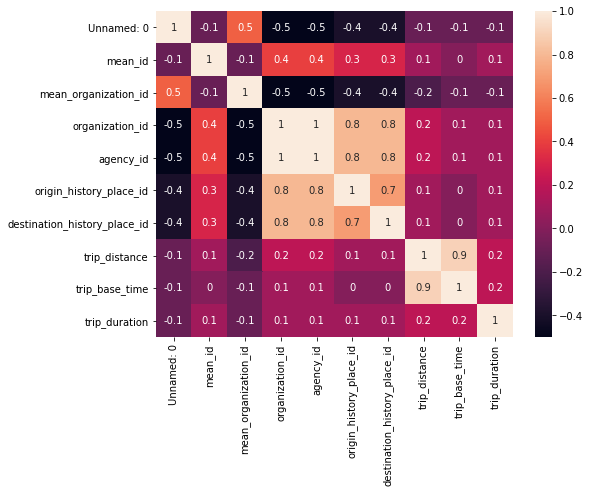

In [ ]:
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

##Model

Split your data in train / test and train as usual. 
Train a model of your choice and evaluate it with a relevant metric. 

# creation  des  tests et des trains

In [ ]:
print(y_train)

        Unnamed: 0  trip_duration
102413      102413           4904
62011        62011           2064
59456        59456          41561
99725        99725           9106
1518          1518           6152
...            ...            ...
54886        54886           2336
76820        76820           4049
103694      103694           4284
860            860           4318
15795        15795          68469

[73578 rows x 2 columns]


In [ ]:
print(y_test)

       Unnamed: 0  trip_duration
84858       84858           4179
37217       37217           4212
64923       64923           5294
21250       21250          74377
64241       64241           9743
...           ...            ...
48433       48433           3740
66499       66499          11583
49667       49667           9180
35852       35852           3050
75793       75793          10161

[31534 rows x 2 columns]


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73578, 11)
(31534, 11)
(73578, 2)
(31534, 2)


#Etude  pour la  programmation  des  modele 

In [ ]:
#Etude de la regression lineaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, y_train)

ValueError: ignored

In [ ]:
# Evaluation du training set
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure
y_train = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train)))
r2 = r2_score(Y_train, y_train)
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test)))
r2 = r2_score(Y_test, y_test)
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

In [ ]:
# affichage des resultats de la regression lineaire 

In [ ]:
from sklearn.linear_model import LogisticRegression
#3
reg = LogisticRegression()
reg.fit(X_train,y_train)
#4
print(reg.coef_,'\n',reg.intercept_)

In [ ]:
Ypred=reg.predict(X_test)
Ypred

NotFittedError: This LogisticRegression instance is not fitted yet


# Optimization 

Optimize the hyperparameters of your algorithm



# Performance

Evaluate the performance of the model using the relevant tools. 

Plot the following graph : MAE on y-axis and trip_duration on the x-axis with an x aggregation of 30 min. 


In [ ]:
#  MAE MEAN ABSOLUTE ERROR


# Part II 
In this part the goal is to see if our model can predict a delay or not. 

A truck is said as 'delayed' if it arrives more than 30 min after the destination_slot_end. Using a confusion matrix show how the previous model performs on the delays detection.

Use a classification model based on the previous dataset that predict if a truck will be delayed or not. Does it performs better than the regression model in delays detection? Use the right tools to compare the two models.

Dans cette partie, l'objectif est de voir si notre modèle peut prédire un retard ou non. Un camion est dit «retardé» s'il arrive plus de 30 minutes après la destination_slot_end. À l'aide d'une matrice de confusion, montrez comment le modèle précédent fonctionne sur la détection des retards. Utilisez un modèle de classification basé sur le jeu de données précédent qui prédisent si un camion sera retardé ou non. Est-ce qu'il fonctionne mieux que le modèle de régression dans la détection des retards? Utilisez les bons outils pour comparer les deux modèles.

In [ ]:
if 